# Download Data from kaggle

In [0]:
# create a data folder in directory
import os

In [2]:
!pwd

/content


In [0]:
newfolder = r'/content/DogsVsCats/data'

if not os.path.exists(newfolder):
  os.makedirs(newfolder)

In [4]:
# create train & test folder in data folder
cd /content/DogsVsCats/

/content/DogsVsCats


In [0]:
# now download dataset from kaggle
# setup kaggle directory and add kaggle.json file
newfolder = r'/content/DogsVsCats/Kaggle'

if not os.path.exists(newfolder):
  os.makedirs(newfolder)

In [6]:
# Setup Kaggle DIR; copy json file ; chmod

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [7]:
# Verify json content
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 66 Nov  6 06:20 kaggle.json
{"username":"anandugale","key":"4d67ff1b745087276daf5fa160513f34"}

In [8]:
# Install kaggle packages

!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 2.8MB/s 
     |████████████████████████████████| 5.3MB 8.7MB/s 
     |████████████████████████████████| 112kB 36.6MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 112kB 44.9MB/s 


In [9]:
# download kaggle compitition dataset
!kaggle competitions download -c dogs-vs-cats

401 - Unauthorized


In [0]:
# extract train and test dataset into a data folder
from zipfile import ZipFile

file_name = 'train.zip'

# opening zipfile in read me mode
with ZipFile(file_name, 'r') as zip:
  print('Extraction of file now..')
  zip.extractall(path='/content/DogsVsCats/data/')
  print('Done')

Extraction of file now..
Done


In [0]:
# extracting test dataset
file_name = 'test1.zip'

# opening zipfile in read me mode
with ZipFile(file_name, 'r') as zip:
  print('Extraction of file now..')
  zip.extractall(path='/content/DogsVsCats/data/')
  print('Done')

Extraction of file now..
Done


# Using Fastai

In [0]:
# Every notebook starts with the following three lines
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# use fastai 
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# if you arre using a computer with small GPU size, you may get outoff memory error so use small batch size
bs = 64
# bs = 16 # uncomment this if you get outof memory error

In [0]:
# Looking at dataset
path = Path('/content/data/')
path

PosixPath('/content/data')

In [0]:
path.ls()

[PosixPath('/content/data/train'), PosixPath('/content/data/test1')]

In [0]:
path_test_img = path/'test1'
path_train_img = path/'train'

In [0]:
# look at how the labels are stored
# labels are stored in filename them self
# use ImageDataBunch.from_name_re gets the labels from the filenames using a regular expression.
fnames = get_image_files(path_train_img)
fnames[:5]

[PosixPath('/content/data/train/cat.2811.jpg'),
 PosixPath('/content/data/train/cat.8631.jpg'),
 PosixPath('/content/data/train/cat.3557.jpg'),
 PosixPath('/content/data/train/dog.12386.jpg'),
 PosixPath('/content/data/train/cat.11859.jpg')]

In [0]:
# define regular expression to extract image name
np.random.seed(2)
pat = r'/([^/]+).\d+.jpg$'

In [0]:
import numpy as np
import pandas as pd

# Preparing training data
filenames = os.listdir('/content/data/train/')
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)
    
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

df.head()
    

,filename,category
0,cat.2811.jpg,0
1,cat.8631.jpg,0
2,cat.3557.jpg,0
3,dog.12386.jpg,1
4,cat.11859.jpg,0


In [0]:
# data = ImageDataBunch.from_name_re(path_train_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [0]:
# using datablock api
data = (ImageList.from_df(df, path_train_img)
        .split_by_rand_pct(valid_pct = 0.2, seed=None)
        .label_from_df('category')
        .add_test_folder(path_test_img)
        .transform(get_transforms(), size=128)
        .databunch()
        .normalize())

In [0]:
# create test databunch api
data_test = (ImageList.from_folder(path_test_img)
             .split_none()
             .label_from_folder()
             .transform(get_transforms(), size=128)
             .databunch()
             .normalize())

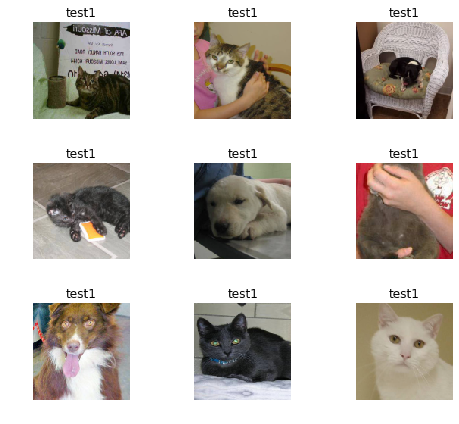

In [0]:
data_test.show_batch(rows=3, figsize=(7,6))

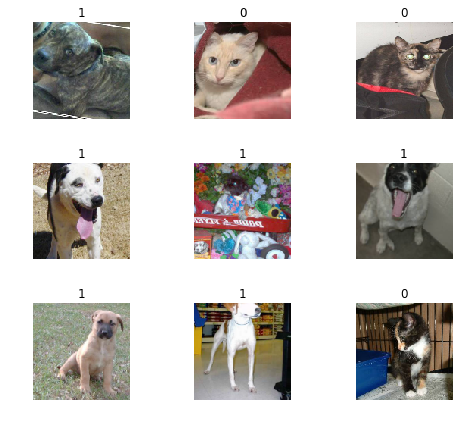

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

[0, 1]


(2, 2)

In [0]:
# Training resnet 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 76976775.23it/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.153580,0.098039,0.037600,03:27
1,0.095808,0.077527,0.032200,03:24
2,0.088797,0.061700,0.021200,03:24
3,0.077457,0.059500,0.022600,03:19


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


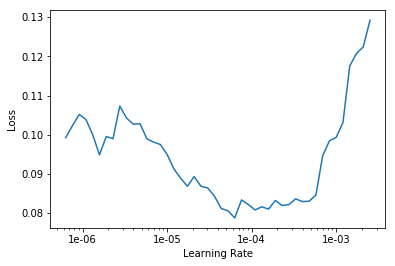

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.079567,0.058564,0.023600,03:21
1,0.058615,0.052304,0.021400,03:23


In [0]:
learn.save('stage-2-34')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

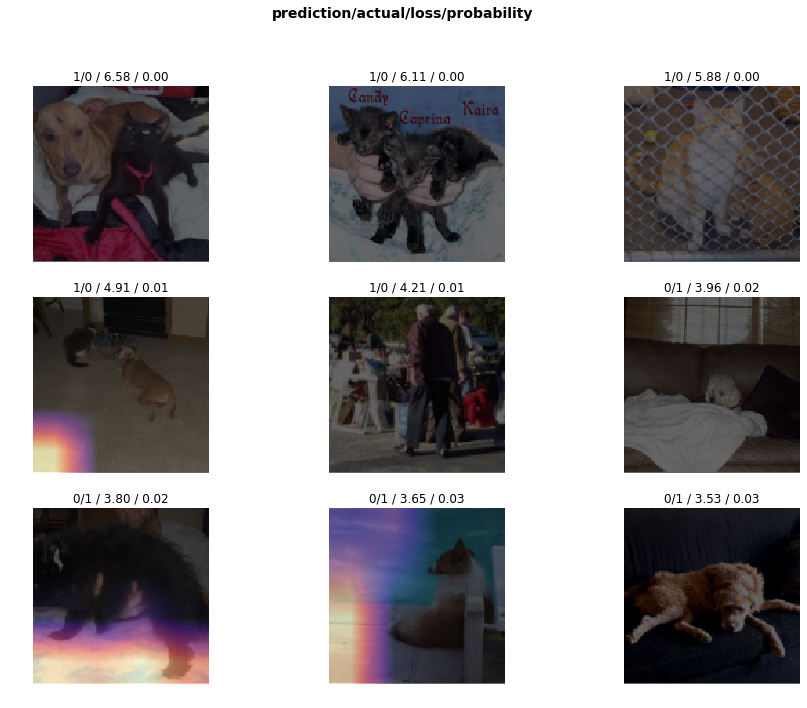

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

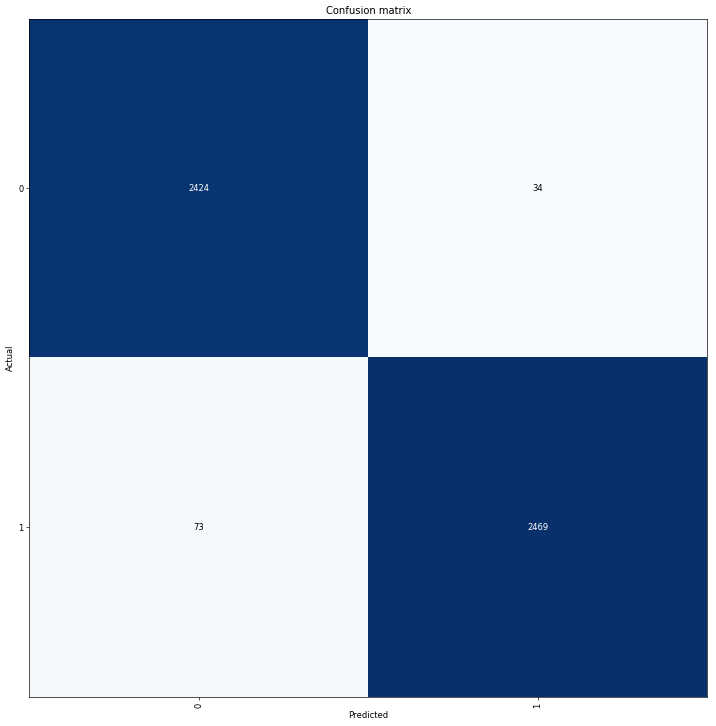

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[(1, 0, 73), (0, 1, 34)]

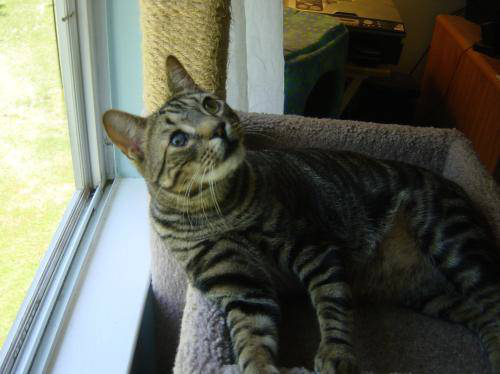

In [0]:
img = open_image('/content/data/test1/1561.jpg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class, pred_idx, outputs

(Category 1, tensor(1), tensor([1.6078e-04, 9.9984e-01]))

In [0]:
# Preparing test data
test_filenames = os.listdir('/content/data/test1/')

test_df = pd.DataFrame({
    'filename': test_filenames
})

test_df.head()

,filename
0,9588.jpg
1,934.jpg
2,3952.jpg
3,3722.jpg
4,1561.jpg


In [0]:
'/content/data/test1/' + test_filenames[0]

'/content/data/test1/9588.jpg'

In [0]:
pred_classes = []

for i in range(test_df.shape[0]):
  path = '/content/data/test1/' + test_filenames[i]
  img = open_image(path)
  pred_class,pred_idx,outputs = learn.predict(img)
  pred_classes.append(pred_class)
  

AttributeError: ignored

In [0]:
len(pred_classes)

12500

In [0]:
pred_class.shape, test_df.shape

(torch.Size([20000]), (12500, 1))

In [0]:

test_df = pd.DataFrame({
    'filename': test_filenames,
    'label' : pred_classes
})

test_df.head()

,filename,label
0,9588.jpg,0
1,934.jpg,1
2,3952.jpg,1
3,3722.jpg,1
4,1561.jpg,0


In [0]:
test_df.to_csv('sampleSubmission.csv', index=False)

# **Using PyTorch**

In [0]:
!pwd

/content/DogsVsCats


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
from torch import optim
import torch.nn.functional as F

import helper

import numpy as np
import os
import copy
import tqdm
from PIL import Image

In [0]:
train_dir = '/content/DogsVsCats/data/train/'
test_dir = '/content/DogsVsCats/data/test1/'
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

In [0]:
class CatDogDataset(Dataset):
    def __init__(self, file_list, dir, mode='train', transform = None):
        self.file_list = file_list
        self.dir = dir
        self.mode= mode
        self.transform = transform
        if self.mode == 'train':
            if 'dog' in self.file_list[0]:
                self.label = 1
            else:
                self.label = 0
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            img = img.numpy()
            return img.astype('float32'), self.label
        else:
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]
        
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

cat_files = [tf for tf in train_files if 'cat' in tf]
dog_files = [tf for tf in train_files if 'dog' in tf]

cats = CatDogDataset(cat_files, train_dir, transform = data_transform)
dogs = CatDogDataset(dog_files, train_dir, transform = data_transform)

catdogs = ConcatDataset([cats, dogs])

In [0]:
# split into train and validation set
# percentage of training set to use as validation
valid_size = 0.2

# obtain training indices that will be used for validation
num_train = len(catdogs)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [0]:
"""data_dir = '/content/DogsVsCats/data/'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('/content/DogsVsCats/data/train', transform=train_transforms)
test_data = datasets.ImageFolder('/content/DogsVsCats/data/test1', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)"""

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(catdogs, batch_size=32,
    sampler=train_sampler, num_workers=4)
valid_loader = torch.utils.data.DataLoader(catdogs, batch_size=32, 
    sampler=valid_sampler, num_workers=4)

In [0]:
# specify the images classes
classes = ['cat', 'dog']

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

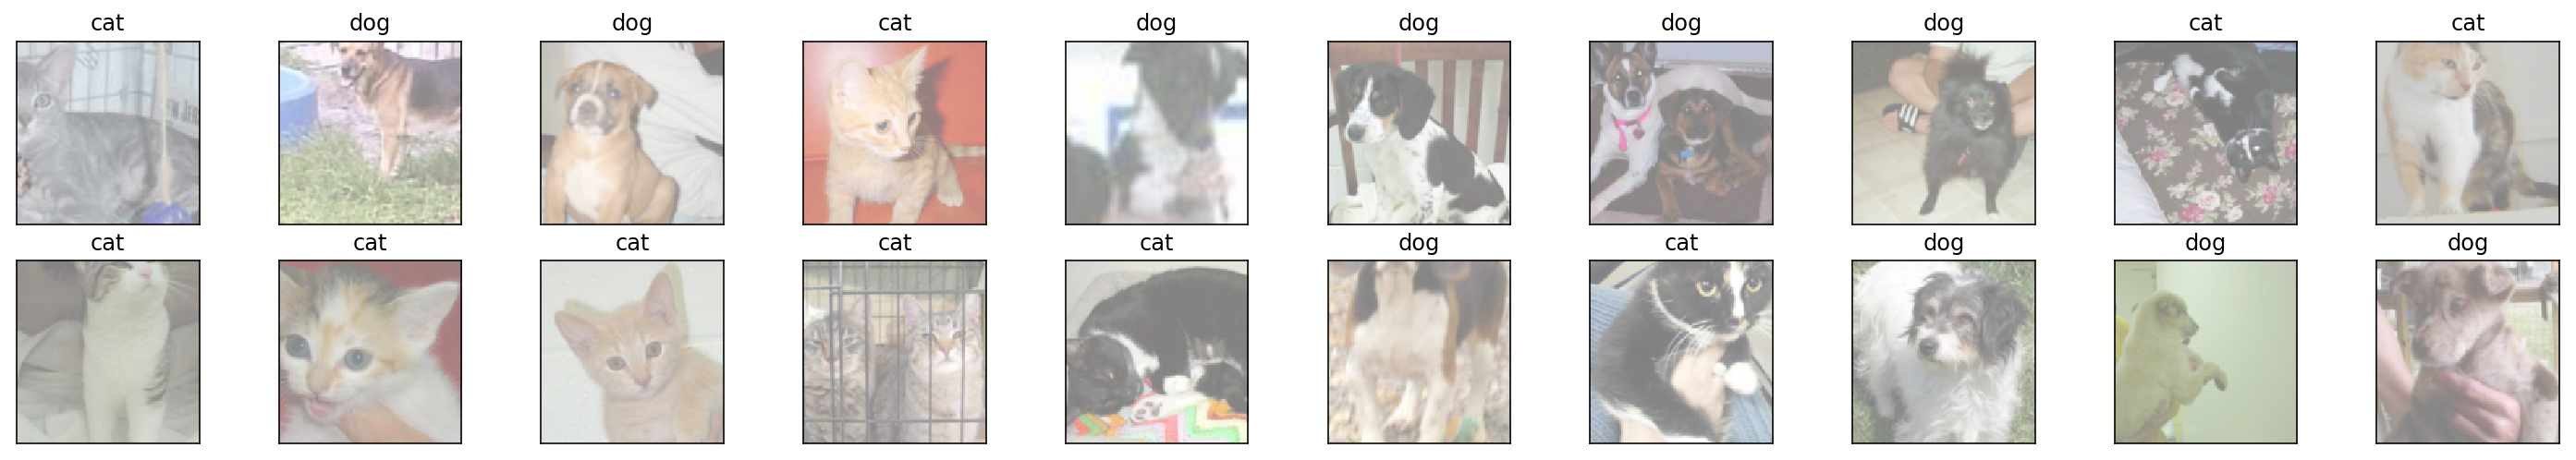

In [0]:
import numpy as np
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

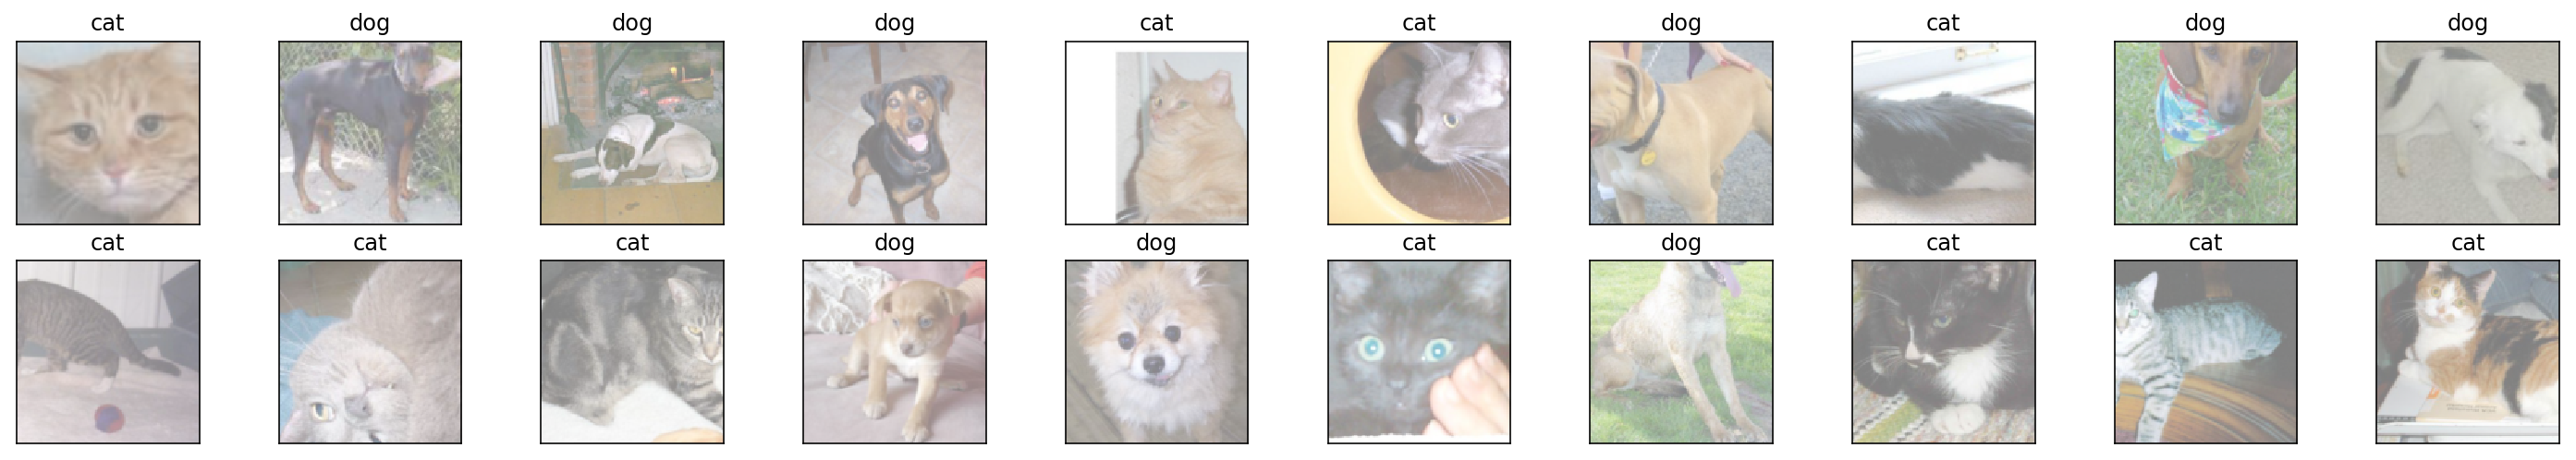

In [0]:
import numpy as np
# obtain one batch of training images
dataiter = iter(valid_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [0]:
# use pretrained model
from torchvision import models
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable

In [0]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
# Load DenseNet Model
model = models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:01<00:00, 18803761.21it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
# above pretrained model have 1000 output layers but we want only 2
# Freeze parameters so we don't backprop through them
for param in model.parameters():
  param.requires_grad = False
  
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

model.classifier = classifier
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [0]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.180579 	Validation Loss: 0.152682
Validation loss decreased (inf --> 0.152682).  Saving model ...
Epoch: 2 	Training Loss: 0.145217 	Validation Loss: 0.123023
Validation loss decreased (0.152682 --> 0.123023).  Saving model ...
Epoch: 3 	Training Loss: 0.139243 	Validation Loss: 0.128062
Epoch: 4 	Training Loss: 0.132413 	Validation Loss: 0.118611
Validation loss decreased (0.123023 --> 0.118611).  Saving model ...
Epoch: 5 	Training Loss: 0.122030 	Validation Loss: 0.113925
Validation loss decreased (0.118611 --> 0.113925).  Saving model ...
Epoch: 6 	Training Loss: 0.123177 	Validation Loss: 0.105056
Validation loss decreased (0.113925 --> 0.105056).  Saving model ...
Epoch: 7 	Training Loss: 0.112347 	Validation Loss: 0.107256
Epoch: 8 	Training Loss: 0.105967 	Validation Loss: 0.104820
Validation loss decreased (0.105056 --> 0.104820).  Saving model ...
Epoch: 9 	Training Loss: 0.106577 	Validation Loss: 0.114309
Epoch: 10 	Training Loss: 0.102628 	Valida

In [0]:
# Load the Model with the Lowest Validation Loss
model.load_state_dict(torch.load('model_cifar.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [0]:
test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

testset = CatDogDataset(test_files, test_dir, mode='test', transform = test_transform)
testloader = DataLoader(testset, batch_size = 32, shuffle=False, num_workers=4)

In [0]:
model.eval()
fn_list = []
pred_list = []
for x, fn in testloader:
  with torch.no_grad():
    if train_on_gpu:
      x = x.cuda()
    output = model(x)
    pred = torch.argmax(output, dim=1)
    fn_list += [n[:-4] for n in fn]
    pred_list += [p.item() for p in pred]

In [0]:
import pandas as pd

In [0]:
submission = pd.DataFrame({"id":fn_list, "label":pred_list})
submission.head()

,id,label
0,7348,1
1,9265,0
2,4368,0
3,10338,0
4,9478,1


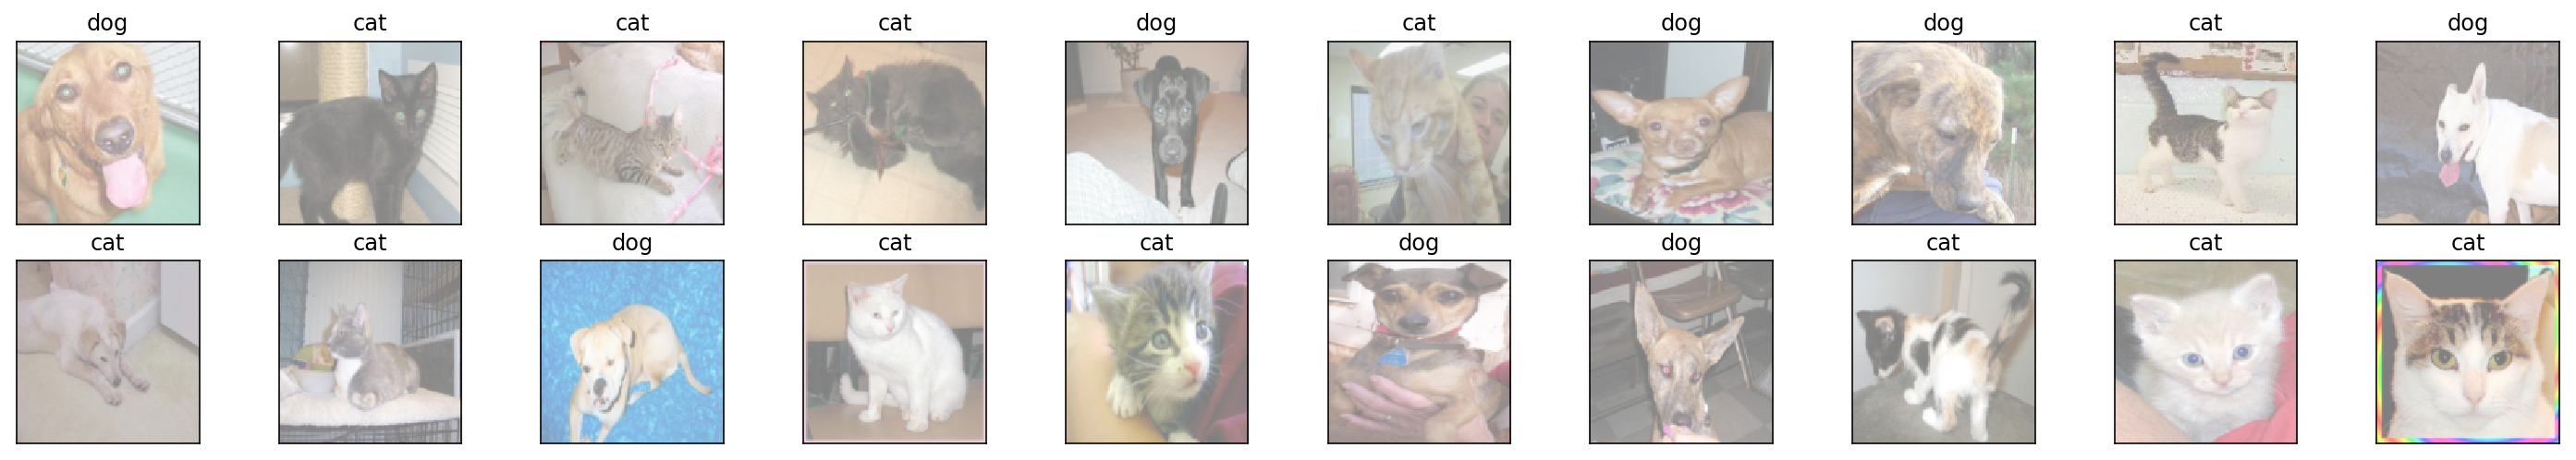

In [0]:
# obtain one batch of training images
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

labels = pred_list
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])